<a href="https://colab.research.google.com/github/Eyabennessib/Machine-Learning/blob/main/TP_Machine_learning_Pandas_Basics_(Titanic_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [167]:
data = pd.read_excel('titanic.xls')

In [102]:
data.shape

(1309, 14)

In [103]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [104]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [105]:
data=data.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'],axis=1)

In [106]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [108]:
data.shape

(1309, 4)

In [109]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [110]:
data.dropna(axis=0, inplace=True)

In [112]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


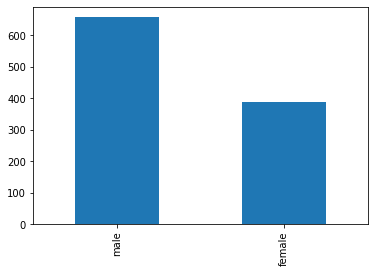

In [114]:
data['sex'].value_counts().plot.bar()

In [52]:
data.groupby(by='pclass').mean()

,survived,age
pclass,,
1,0.637324,39.159918
2,0.440613,29.506705
3,0.261477,24.816367


In [91]:
data['sex']

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

In [92]:
data['sex'][0:10]
#à droite une série et a gauche l'indexing

0    female
1      male
2    female
3      male
4    female
5      male
6    female
7      male
8    female
9      male
Name: sex, dtype: object

In [120]:
data [data['age'] < 18]
#generer un masque


,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
53,1,0,male,17.0000
54,1,1,male,11.0000
55,1,1,female,14.0000
...,...,...,...,...
1265,3,0,female,10.0000
1275,3,0,male,16.0000
1279,3,0,female,14.0000
1300,3,1,female,15.0000


In [121]:
data [data['age'] < 18]['pclass'].value_counts()


3    106
2     33
1     15
Name: pclass, dtype: int64

In [123]:
data [data['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [128]:
data.iloc[0:2,0:2] #ligne indexing

,pclass,survived
0,1,1
1,1,1


In [130]:
data.loc[0:2, ['age', 'sex']] #columne indexing

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female


In [131]:
data.iloc[0:2, : ] #tous les columnes

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167


In [168]:
data['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [147]:
data.loc[data['age'] <=20, 'age'] = 0
data.loc[(data['age'] >20) & (data['age'] <= 30), 'age']= 1
data.loc[(data['age'] >30) & (data['age'] <= 40), 'age']= 2
data.loc[data['age']  >40, 'age'] = 3


In [148]:
data.head()

,pclass,survived,sex,age
0,1,1,female,1.0
1,1,1,male,0.0
2,1,0,female,0.0
3,1,0,male,1.0
4,1,0,female,1.0


In [154]:
data['age'].value_counts()

1.0    361
0.0    248
3.0    227
2.0    210
Name: age, dtype: int64

In [153]:
data.groupby(['age']).mean()

,pclass,survived
age,,
0.0,2.568548,0.459677
1.0,2.371191,0.371191
2.0,2.109524,0.423810
3.0,1.643172,0.396476


In [169]:
def categorie(age):
    if (age <= 20):
        return '<20'
    elif (age > 20) & (age <= 30):
        return '20-30'
    elif (age > 30) & (age <= 40):
        return '30-40'
    else:
        return '+40'

In [170]:
data['age'].map(categorie)

0       20-30
1         <20
2         <20
3       20-30
4       20-30
        ...  
1304      <20
1305      +40
1306    20-30
1307    20-30
1308    20-30
Name: age, Length: 1309, dtype: object

## **Change data type string to numeric  data with these functions : map(), replace(), cat.codes**

In [171]:
data['sex'].map({'male':0, 'female':1})

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1309, dtype: int64

In [172]:
data['sex'].replace(['male', 'female'], [0,1])

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1309, dtype: int64

In [173]:
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8